##Lab 5
###part 1

In [1]:
#1.	Import the libraries

import numpy as np
#Import TfIdfVectorizer from the scikit-learn library
from sklearn.feature_extraction.text import TfidfVectorizer
# Import cosine_similarity to compute the dot product
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
#2.	Load the dataset into a datafrme
import pandas as pd
#Import data from the clean file
df = pd.read_csv('/content/ccai422_lab05_part1_1_data.csv')

#Print the head of the cleaned DataFrame
df.head()


,title,genres,runtime,vote_average,vote_count,year
0,Toy Story,"['Animation', 'Comedy', 'Family']",81.0,7.7,5415.0,1995
1,Jumanji,"['Adventure', 'Fantasy', 'Family']",104.0,6.9,2413.0,1995
2,Grumpier Old Men,"['Romance', 'Comedy']",101.0,6.5,92.0,1995
3,Waiting to Exhale,"['Comedy', 'Drama', 'Romance']",127.0,6.1,34.0,1995
4,Father of the Bride Part II,['Comedy'],106.0,5.7,173.0,1995


In [3]:
#Import the original file
orig_df = pd.read_csv('/content/ccai422_lab05_part1_2_data.csv', low_memory=False)

#Add the useful features into the cleaned dataframe
df['overview'], df['id'] = orig_df['overview'], orig_df['id']
orig_df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
#3.	Use the TFIDF function provided by sklearn to represent the movies using the overview field

#Define a TF-IDF Vectorizer Object. Remove all english stopwords
tfidf = TfidfVectorizer()

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
tfidf_matrix = tfidf.fit_transform(df['overview'])
#tfidf_matrix = tfidf.fit_transform(corpus)

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(45466, 76132)

In [5]:
#4.	Compute the cosine similarity

# The slicing is due to the lack of enough memory. Only use it if your machine crashed as a result of using the entire matrix
tfidf_matrix = tfidf_matrix[:1000]
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [6]:
#5.	Base the recommendation on the movie titles by mapping them to indices

#Construct a reverse mapping of indices and movie titles, and drop duplicate titles, if any
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices.head()


,0
title,
Toy Story,0
Jumanji,1
Grumpier Old Men,2
Waiting to Exhale,3
Father of the Bride Part II,4


In [7]:
#6.	Write the recommendation function

# Function that takes in movie title as input and gives recommendations
def content_recommender(title, cosine_sim=cosine_sim, df=df, indices=indices):
    # Obtain the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    # And convert it into a list of tuples as described above
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies. Ignore the first movie.
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


In [8]:
#7.	Recommend a movie based on a given title

print(content_recommender('The Lion King'))


42                    Restoration
600                         Fargo
892              The Wizard of Oz
89     The Journey of August King
643                   DragonHeart
572                    The Escort
110           Rumble in the Bronx
185                  The Prophecy
405          Addams Family Values
55        Kids of the Round Table
Name: title, dtype: object


### Part 2

In [9]:
import numpy as np
from nltk.tokenize import word_tokenize
from collections import Counter
import math
import re
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
all_documents = ['Topic sentences are similar to mini thesis statements. Like a thesis statement',
 'a topic sentence has a specific main point. Whereas the thesis is the main point of the essay, the topic sentence is the main point of the paragraph. Like the thesis statement, a topic sentence has a unifying function. But a thesis statement or topic sentence alone doesn’t guarantee unity.',
 'An essay is unified if all the paragraphs relate to the thesis, whereas a paragraph is unified if all the sentences relate to the topic sentence.',
 'A thesis on Roger Federer the greated tennis player should be made',
 'Nadal is also a great and he deserves a thesis in tennis']


 2.	[2.5 mark] Represent the documents contained in the all_documents list using TFIDF. Use You are not allowed to use any library and you should build your TFIDF function from scratch. Use the following link to help you build your TFIDF representation

In [11]:
# TF function
# Calculate Term Frequency (TF)
def compute_tf(document):
    words = word_tokenize(document.lower())
    word_count = Counter(words)
    doc_len = len(words)
    tf = {word: count / doc_len for word, count in word_count.items()}
    return tf

In [12]:
#IDF function
# Calculate Inverse Document Frequency (IDF)
def compute_idf(documents):
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in word_tokenize(doc.lower()))
    for word in all_words:
        contains_word = sum(1 for doc in documents if word in word_tokenize(doc.lower()))
        idf[word] = math.log(N / (1 + contains_word))
    return idf

In [13]:
# TF-IDF function
# Calculate TF-IDF for all documents
def compute_tfidf(documents):
    idf = compute_idf(documents)
    tfidf = []
    for doc in documents:
        tf = compute_tf(doc)
        tfidf_doc = {word: tf[word] * idf[word] for word in tf}
        tfidf.append(tfidf_doc)
    return tfidf

# Compute TF-IDF for the sample documents
tfidf_custom = compute_tfidf(all_documents)

3.	[1 marks] Apply the cosine similarity using sklearn. Use the normal cosine similarity model that is computed using the below formula (Hint: you can use the Compressed Sparse Row matrix function sparse.csr_matrix() to convert the list representing your TFIDF into csr_matrix)
 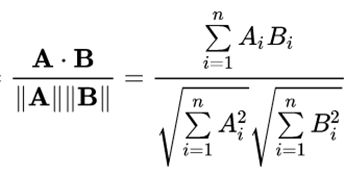

In [14]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Convert custom TF-IDF to a sparse matrix for cosine similarity calculation
vocab = list({word for doc in tfidf_custom for word in doc})
tfidf_vectors = []
for doc in tfidf_custom:
    tfidf_vectors.append([doc.get(word, 0) for word in vocab])

tfidf_matrix_custom = csr_matrix(tfidf_vectors)
cosine_sim_custom = cosine_similarity(tfidf_matrix_custom)


4.	[1.5 mark] Modify the conten_recommender function of Part-1 or use your own function to recommend a document to a user who likes the document that says:
’A thesis on Roger Federer the greated tennis player should be made’


In [15]:
def content_recommender_custom(target_text, cosine_sim=cosine_sim_custom, documents=all_documents, tfidf_custom=tfidf_custom, vocab=vocab):
    """Recommends documents similar to the target text.

    Args:
        target_text (str): The text to find similar documents for.
        cosine_sim (array-like, optional): Cosine similarity matrix. Defaults to cosine_sim_custom.
        documents (list, optional): List of documents. Defaults to all_documents.
        tfidf_custom (list, optional): TF-IDF representation of documents. Defaults to tfidf_custom.
        vocab (list, optional): Vocabulary of the documents. Defaults to vocab.

    Returns:
        list: List of similar documents.
    """
    # Calculate TF-IDF for the target text
    target_tfidf = compute_tf(target_text)
    target_tfidf_vector = [target_tfidf.get(word, 0) for word in vocab]

    # Calculate cosine similarity between target text and documents
    target_tfidf_matrix = csr_matrix([target_tfidf_vector])
    sim_scores = cosine_similarity(target_tfidf_matrix, tfidf_matrix_custom)[0]

    # Get indices of most similar documents
    sim_scores_sorted = sorted(enumerate(sim_scores), key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores_sorted[1:6]]  # Exclude the target text itself

    # Return most similar documents
    return [documents[i] for i in top_indices]


In [16]:
# Test the custom recommender
print(content_recommender_custom('A thesis on Roger Federer the greatest tennis player should be made'))

['An essay is unified if all the paragraphs relate to the thesis, whereas a paragraph is unified if all the sentences relate to the topic sentence.', 'a topic sentence has a specific main point. Whereas the thesis is the main point of the essay, the topic sentence is the main point of the paragraph. Like the thesis statement, a topic sentence has a unifying function. But a thesis statement or topic sentence alone doesn’t guarantee unity.', 'Nadal is also a great and he deserves a thesis in tennis', 'Topic sentences are similar to mini thesis statements. Like a thesis statement']


### Part 3

In [18]:
import pandas as pd

# Load both datasets
df = pd.read_csv('/content/ccai422_lab05_part1_1_data.csv')
orig_df = pd.read_csv('/content/ccai422_lab05_part1_2_data.csv', low_memory=False)

# Merge the 'overview' column from orig_df to df
df['overview'] = orig_df['overview'].fillna('')  # Replace NaN with empty strings to avoid errors
df['id'] = orig_df['id']

1.	[1.5 marks] Modify your TFIDF implementation to compute the term frequency based on the row frequency instead of the relative row frequency (i.e. do not consider the number of words per document)

In [28]:
# Function to compute term frequency (TF) using raw count
def compute_tf(doc):
    words = word_tokenize(doc.lower())
    return Counter(words)  # Absolute frequency for each word in the document

# Function to compute inverse document frequency (IDF)
def compute_idf_optimized(documents):
    N = len(documents)
    df_dict = defaultdict(int)

    for doc in documents:
        unique_words = set(word_tokenize(doc.lower()))  # Count each unique word per document
        for word in unique_words:
            df_dict[word] += 1

    # Calculate IDF for each word
    idf_dict = {word: math.log(N / (1 + df_count)) for word, df_count in df_dict.items()}
    return idf_dict

# Function to compute TF-IDF
def compute_tfidf(tf, idf):
    return {word: tf[word] * idf.get(word, 0) for word in tf}  # Use IDF to scale each term frequency


[Step 3: Apply Custom TF, IDF, and TF-IDF on the Dataset]

In [29]:
# Prepare dataset of movie overviews
movie_overviews = df['overview'].tolist()

# Calculate IDF for the entire corpus
idf = compute_idf_optimized(movie_overviews)

# Calculate TF and TF-IDF for each document
tfidf_documents = []
for doc in movie_overviews:
    tf = compute_tf(doc)
    tfidf = compute_tfidf(tf, idf)
    tfidf_documents.append(tfidf)


Step 4: Convert TF-IDF Dictionary to Matrix and Compute Cosine Similarity


In [30]:
from scipy.sparse import lil_matrix

# Generate a consistent vocabulary from TF-IDF dictionaries
vocab_movies = list({word for doc in tfidf_documents for word in doc})

# Mapping each word to its index in the vocabulary
vocab_index = {word: idx for idx, word in enumerate(vocab_movies)}

# Initialize a sparse matrix in LIL format for row-wise assignment
tfidf_matrix_sparse = lil_matrix((len(tfidf_documents), len(vocab_movies)))

# Populate the sparse matrix with TF-IDF values
for i, doc in enumerate(tfidf_documents):
    for word, tfidf_value in doc.items():
        if word in vocab_index:
            word_idx = vocab_index[word]
            tfidf_matrix_sparse[i, word_idx] = tfidf_value

# Convert to CSR format for efficient computations
tfidf_matrix = tfidf_matrix_sparse.tocsr()

# Compute cosine similarity on the CSR matrix
cosine_sim_movies = cosine_similarity(tfidf_matrix)


Step 5: Define a Recommendation Function Based on Custom TF-IDF and Cosine Similarity

In [31]:
# Create a reverse mapping of movie titles to indices
df['title'] = df['title'].str.lower()  # Ensure lowercase for matching
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Define a recommendation function
def recommend_movie(title, cosine_sim=cosine_sim_movies, df=df, indices=indices):
    title = title.lower()  # Standardize to lowercase
    if title not in indices:
        return f"The title '{title}' is not found in the dataset."

    # Get index of the movie
    idx = indices[title]

    # Get similarity scores for this movie and sort them
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]  # Exclude the movie itself

    # Retrieve top 10 most similar movies
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

# Test the recommendation function for 'The Lion King'
print("Top 10 recommendations for 'The Lion King':")
print(recommend_movie('The Lion King'))


Top 10 recommendations for 'The Lion King':
34682    how the lion cub and the turtle sang a song
9115                  the lion king 2: simba's pride
9353                                the lion king 1½
13079                                     crows zero
27933              massaï, les guerriers de la pluie
42829                                           prey
17041                                   african cats
25654                                 fearless fagan
7658                                the razor's edge
31208                                     white lion
Name: title, dtype: object


Step 6: Compare Results with Part 1

In [32]:
# Part 1 Recommendation function using library-based TF-IDF
print("Part 1 Recommendations for 'The Lion King' (Library-based TF-IDF):")
print(content_recommender('The Lion King'))

# Part 3 Recommendations
print("\nPart 3 Recommendations for 'The Lion King' (Custom TF-IDF with Row Frequency):")
print(recommend_movie('The Lion King'))


Part 1 Recommendations for 'The Lion King' (Library-based TF-IDF):
42                    Restoration
600                         Fargo
892              The Wizard of Oz
89     The Journey of August King
643                   DragonHeart
572                    The Escort
110           Rumble in the Bronx
185                  The Prophecy
405          Addams Family Values
55        Kids of the Round Table
Name: title, dtype: object

Part 3 Recommendations for 'The Lion King' (Custom TF-IDF with Row Frequency):
34682    how the lion cub and the turtle sang a song
9115                  the lion king 2: simba's pride
9353                                the lion king 1½
13079                                     crows zero
27933              massaï, les guerriers de la pluie
42829                                           prey
17041                                   african cats
25654                                 fearless fagan
7658                                the razor's edge
31208    

# The End
      .-""""-.
     / -    - \
    |  O    O  |
    |     >    |
     \  \__/  /
      `-.....-`
                /
        /|\\   /
        / | \\/
          |
        / \\
        /   \
